## Arbitrary Value Imputation

* This technique was derived from Kaggle Competition.


* It consists of replacing NAN by arbitrary values.

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("titanic.csv", usecols=["Age","Fare","Survived"])
df.head(6)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
5,0,NaN,8.4583


In [ ]:
def impute_nan(df,variable):
    df[variable+'_zero']=df[variable].fillna(0)
    df[variable+'_hundred']=df[variable].fillna(100)

* The arbitary value should be taken with respect to each feature.

* For each feature, the arbitary value may differ.

* Minimum arbitary value and maximum arbitary value(**far away from the outlier)** is taken in the above example.

* It should not be more frequenly present.

* Used to find the importance of the missing values.

<AxesSubplot:>

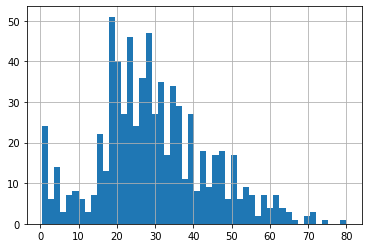

In [ ]:
df['Age'].hist(bins=50)

In [ ]:
impute_nan(df, 'Age')

In [ ]:
df.head(6)

,Survived,Age,Fare,Age_zero,Age_hundred
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
5,0,NaN,8.4583,0.0,100.0


<AxesSubplot:>

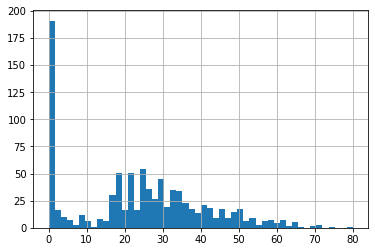

In [ ]:
df['Age_zero'].hist(bins=50)

<AxesSubplot:>

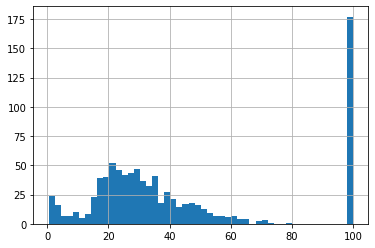

In [ ]:
df['Age_hundred'].hist(bins=50)

1. **Advantages**

    * Easy to implement.
    * Captures the importance of missingness if there is one.


2. **Disadvantages**

    * Distorts the original distribution of the variable
    * If missingness is not important, it may mask the predictive power of the original variable by distorting its distribution.
    * Hard to decide which value to use.

## How To Handle Categorical Missing Values

### 1. Frequent Category Imputation

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('loan.csv', usecols=['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'])

In [ ]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


#### Percentage of Missing Values

In [ ]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [ ]:
df.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
GarageType     0.055479
SalePrice      0.000000
dtype: float64

In [ ]:
df.shape

(1460, 4)

In [ ]:
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

#### Compute the frequency with every feature

* Since **GarageType** and **BsmtQual** have less missing values we will be replacing it with the **highest frequency** data in those columns.

* Data will not be distorted as it will not make a significant amount of change.

<AxesSubplot:>

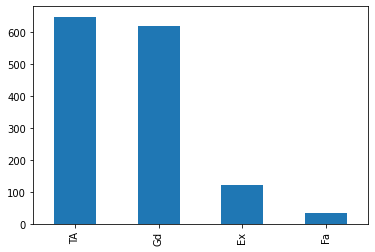

In [ ]:
df['BsmtQual'].value_counts().plot.bar()

In [ ]:
df.groupby(['BsmtQual'])['BsmtQual'].count()

BsmtQual
Ex    121
Fa     35
Gd    618
TA    649
Name: BsmtQual, dtype: int64

<AxesSubplot:xlabel='BsmtQual'>

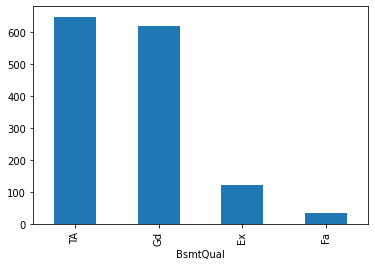

In [ ]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

<AxesSubplot:>

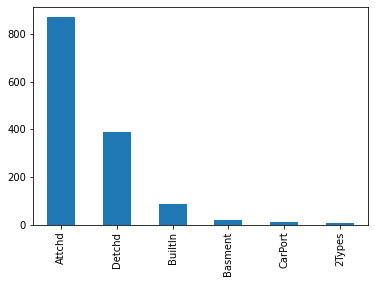

In [ ]:
df['GarageType'].value_counts().plot.bar()

<AxesSubplot:>

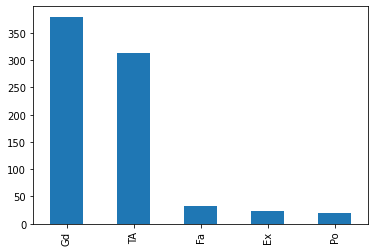

In [ ]:
df['FireplaceQu'].value_counts().plot.bar()

In [ ]:
df['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [ ]:
df['GarageType'].value_counts()[0]

870

In [ ]:
df['GarageType'].value_counts().index[0]

'Attchd'

In [ ]:
df['GarageType'].mode()

0    Attchd
dtype: object

In [ ]:
df['GarageType'].mode()[0]

'Attchd'

#### Replacing the Missing Values with the Mode Value of the Same Column(Highest Frequency)

In [ ]:
def impute_nan(df,variable):
    most_frequent_category=df[variable].mode()[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [ ]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [ ]:
df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

<AxesSubplot:>

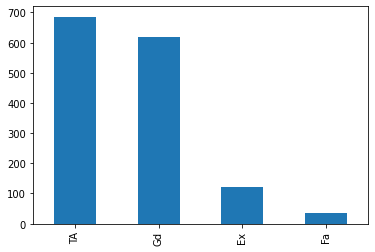

In [ ]:
df['BsmtQual'].value_counts().plot.bar()

In [ ]:
df.groupby(['BsmtQual'])['BsmtQual'].count()

BsmtQual
Ex    121
Fa     35
Gd    618
TA    686
Name: BsmtQual, dtype: int64

<AxesSubplot:>

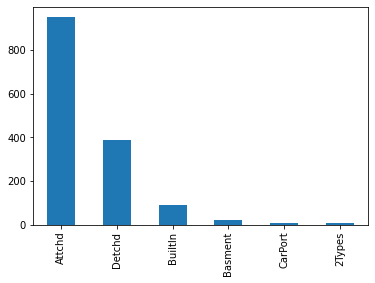

In [ ]:
df['GarageType'].value_counts().plot.bar()

In [ ]:
df.groupby(['GarageType'])['GarageType'].count()

GarageType
2Types       6
Attchd     951
Basment     19
BuiltIn     88
CarPort      9
Detchd     387
Name: GarageType, dtype: int64

<AxesSubplot:>

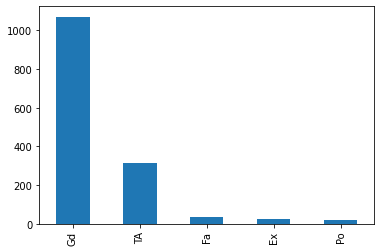

In [ ]:
df['FireplaceQu'].value_counts().plot.bar()

In [ ]:
df.groupby(['FireplaceQu'])['FireplaceQu'].count()

FireplaceQu
Ex      24
Fa      33
Gd    1070
Po      20
TA     313
Name: FireplaceQu, dtype: int64

* FireplaceQu should not be replaced by the mode value because it contains a lot of missing value.

* Create distortion in the dataset column with respect to the mode value

1. **Advantages**

    * Easy To implement.
    * Faster way to implement. 
    
    
2. **Disadvantages**
    
    * Since we are using the more frequent labels, it may use them in an over respresented way, if there are many NAN values.
    * It distorts the relation of the most frequent label.

### 2. Adding a variable to capture NAN value

In [ ]:
df=pd.read_csv('loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [ ]:
import numpy as np

df['BsmtQual_Var']=np.where(df['BsmtQual'].isnull(),1,0)
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [ ]:
df['BsmtQual'].mode()

0    TA
dtype: object

In [ ]:
frequent = df['BsmtQual'].mode()[0]
frequent

'TA'

In [ ]:
df['BsmtQual'].fillna(frequent,inplace=True)

In [ ]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [ ]:
df['FireplaceQu_Var']=np.where(df['FireplaceQu'].isnull(),1,0)
frequent=df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent,inplace=True)

In [ ]:
frequent=df['FireplaceQu'].mode()[0]
frequent

'Gd'

In [ ]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var,FireplaceQu_Var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


### 3. More frequent categories, we just replace NAN with a new category *(Most Used Technique)*

In [ ]:
df=pd.read_csv('loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [ ]:
def impute_nan(df,variable):
    df[variable+"newvar"]=np.where(df[variable].isnull(),"Missing",df[variable])

In [ ]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [ ]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [ ]:
df=df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)
df.head()

,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
